# ROC Curves and AUC - Lab


## Introduction 

In this lab, we'll practice drawing ROC graphs, calculating AUC, and interpreting these results. In doing so, we will also further review logistic regression, by briefly fitting a model as in a standard data science pipeline.

## Objectives

You will be able to:

* Evaluate classification models using various metrics
* Define and understand ROC and AUC

## Training the Model

Start by repeating the previous modelling steps we have discussed. For this problem, you are given a dataset **mushrooms.csv**. You're first job is to train a LogisticRegression classifier on the dataset to determine whether the mushroom is 
- eatable = **e** 

or 
- poisonous = **p**. 

The first column of the dataset *class* indicates whether or not the mushroom is poisonous or edible.

** For consistency use random_state=0**

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('mushrooms.csv')
df.head()

# Define appropriate X and y
X = df[df.columns[1:]]
X = pd.get_dummies(X)
y = pd.get_dummies(df["class"]).iloc[:,1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model = logreg.fit(X_train, y_train)
print(model) # Preview model params

# Predict
y_pred_test = model.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


## ROC Metrics
  
Next, calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [2]:
from sklearn.metrics import roc_curve, auc

# First calculate the probability scores of each of the datapoints:
y_score = model.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Drawing the ROC Graph

Next, use the false positive rate and true positive rate to plot the Receiver Operating Characteristic Curve for both the train and test sets.

AUC: 1.0


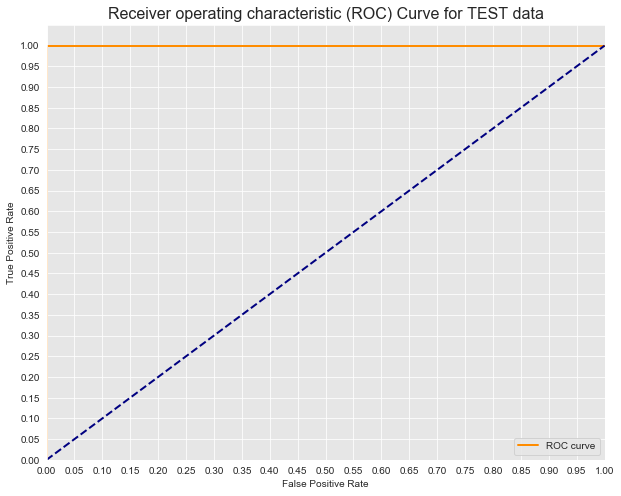

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TEST DATA
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TEST data', fontsize=16)
plt.legend(loc="lower right")

print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

AUC: 1.0


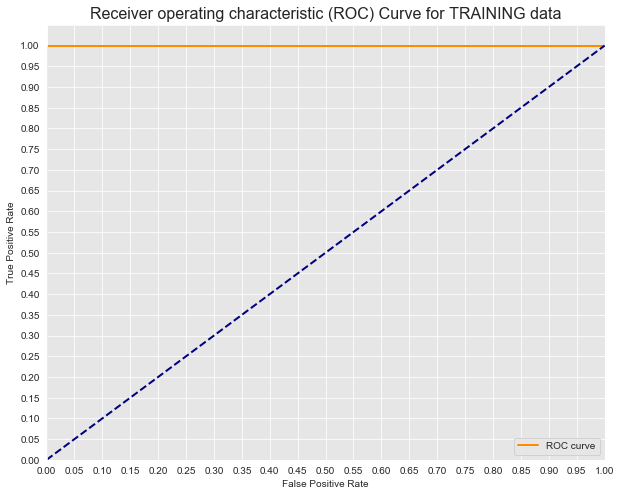

In [4]:
# TEST DATA
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic (ROC) Curve for TRAINING data', fontsize=16)
plt.legend(loc="lower right")

print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

## Interpretation:

What do you notice about these ROC curves?
- Both training and test data have an AUC of 1.0, indicating their performance is perfect.

## Interpretation
Look at the ROC curve graph from the lesson:  

<img src="images/lesson_roc_graph.png">

Think about the scenario of this model: predicting heart disease. If you tune the current model to have a 82% True Positive Rate, (you've still missed 20% of those with heart disease), what is the False positive rate?

In [9]:
# checking the graph at tp = 0.82 --> fp = 0.17

## Interpretation 2
If you instead tune the model to have a 95.2% True Postive Rate, what will the False Positive Rate be?

In [10]:
# checking the graph at tp = 0.925 --> fp = 0.27

## Opinion
In the case of heart disease that we've been talking about, do you find any of the above cases acceptable? How would you tune the model. Describe what this would mean in terms of the number of patients falsely scared of having heart disease and the risk of missing the warning signs for those who do actually have heart disease.

With such an important decision as detecting heart disease, we would hope for more accurate results. In my opinion, the true-positive-rate is the more important of the two in this scenario:

- The **true-positive-rate** determines the % of patients with heart disease who were correctly identified and warned. 
- The **false-positive-rate** is also important, but I would rather accidently scare a few healthy patients and warn them of potentially having heart disease then having missed real sick patients. 

That said, the false-positive-rate becomes rather unacceptably high once the true-positive-rate exceeds .95: This true-positive-rate indicates that out of 100 patients with heart disease we correctly warn 95 of them, but fail to warn 5. At the same time, this has a false-positive-rate of nearly .25 meaning that roughly one in four times we incorrectly warn a patient of heart disease when they are actually healthy.

## Summary

In this lesson we further explored ROC curves and AUC, drawing graphs and then interpreting these results to lead to a more detailed and contextualized understanding of our model's accuracy.